In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-01-19T17:00:00,4,Trentino-Alto Adige,483,76,559,13995,14554,78,579,...,14.0,10436.0,954.0,96.0,13.60,3.84,5.55,60.69,0.00,0.54
330,2021-01-20T17:00:00,4,Trentino-Alto Adige,473,72,545,14073,14618,64,719,...,8.0,11804.0,939.0,78.0,13.21,3.73,6.09,76.57,-5.26,0.44
331,2021-01-21T17:00:00,4,Trentino-Alto Adige,462,71,533,14296,14829,211,730,...,14.0,11631.0,1196.0,223.0,13.32,3.59,6.28,61.04,-1.39,1.44
332,2021-01-22T17:00:00,4,Trentino-Alto Adige,446,65,511,14575,15086,257,689,...,4.0,10716.0,892.0,279.0,12.72,3.39,6.43,77.24,-8.45,1.73


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 745
Nuovi tamponi: 12011.0
Percentuale nuovi positivi/nuovi tamponi: 6.2 %
Nuovi guariti: 389.0
Nuovi deceduti: 9.0
Variazione positivi ricoverati con sintomi: -24.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: 369.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-24T17:00:00,4,Trentino-Alto Adige,895,82,977,13151,14128,-5,303,...,30.0,3649.0,1169.0,5.0,8.39,6.92,8.30,25.92,1.23,-0.04
1,2020-11-25T17:00:00,4,Trentino-Alto Adige,863,82,945,13102,14047,-81,520,...,15.0,6135.0,1176.0,-49.0,8.68,6.73,8.48,44.22,0.00,-0.57
2,2020-11-26T17:00:00,4,Trentino-Alto Adige,851,83,934,12878,13812,-235,589,...,20.0,6425.0,1807.0,-224.0,8.89,6.76,9.17,32.60,1.22,-1.67
3,2020-11-27T17:00:00,4,Trentino-Alto Adige,822,86,908,12884,13792,-20,639,...,19.0,5855.0,1903.0,6.0,9.47,6.58,10.91,33.58,3.61,-0.14
4,2020-11-28T17:00:00,4,Trentino-Alto Adige,813,78,891,12800,13691,-101,713,...,9.0,6342.0,2208.0,-84.0,8.75,6.51,11.24,32.29,-9.30,-0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-19T17:00:00,4,Trentino-Alto Adige,483,76,559,13995,14554,78,579,...,14.0,10436.0,954.0,96.0,13.60,3.84,5.55,60.69,0.00,0.54
57,2021-01-20T17:00:00,4,Trentino-Alto Adige,473,72,545,14073,14618,64,719,...,8.0,11804.0,939.0,78.0,13.21,3.73,6.09,76.57,-5.26,0.44
58,2021-01-21T17:00:00,4,Trentino-Alto Adige,462,71,533,14296,14829,211,730,...,14.0,11631.0,1196.0,223.0,13.32,3.59,6.28,61.04,-1.39,1.44
59,2021-01-22T17:00:00,4,Trentino-Alto Adige,446,65,511,14575,15086,257,689,...,4.0,10716.0,892.0,279.0,12.72,3.39,6.43,77.24,-8.45,1.73


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

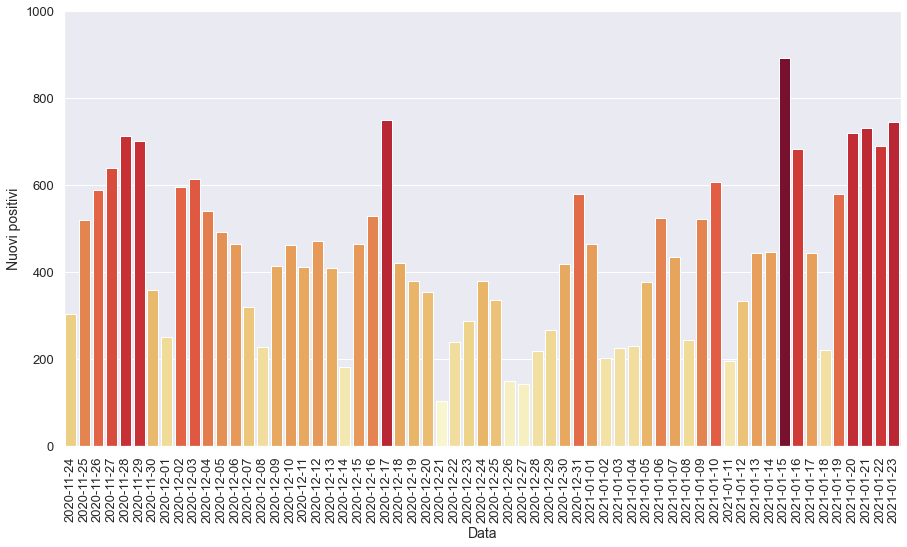

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

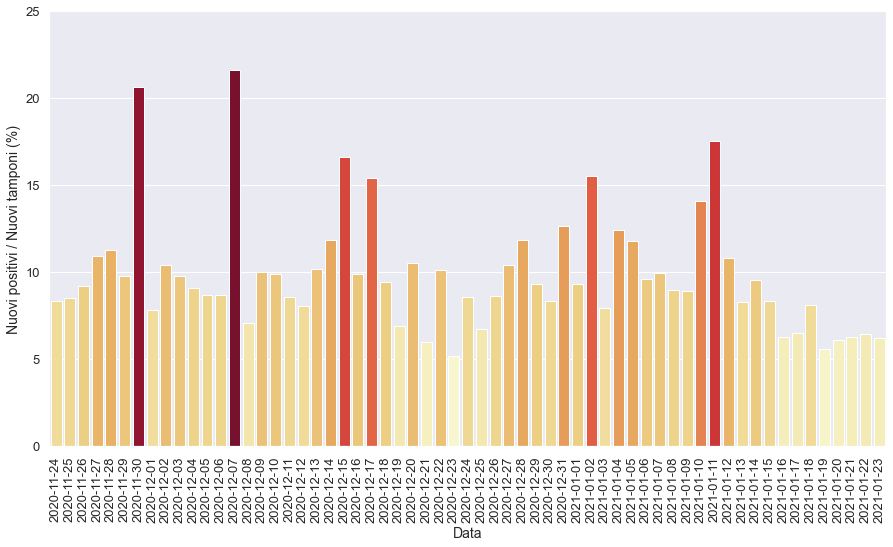

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

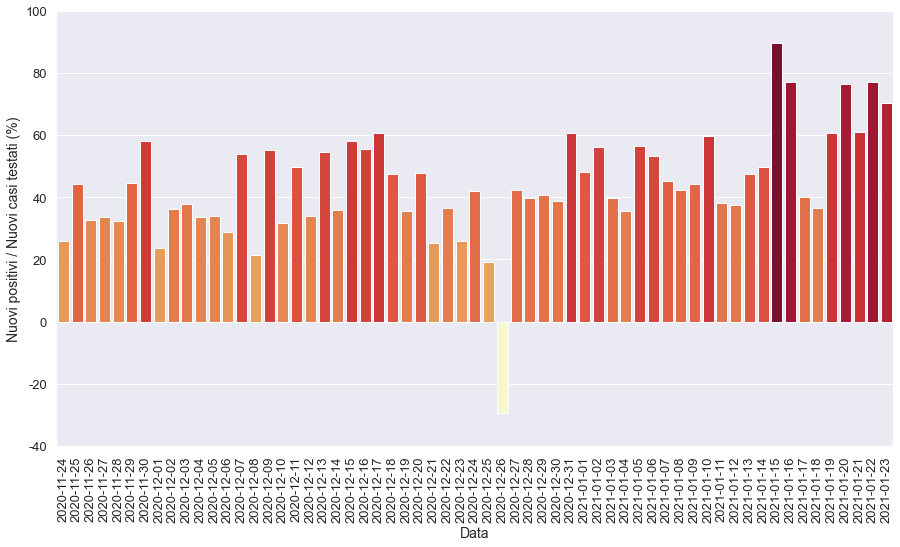

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

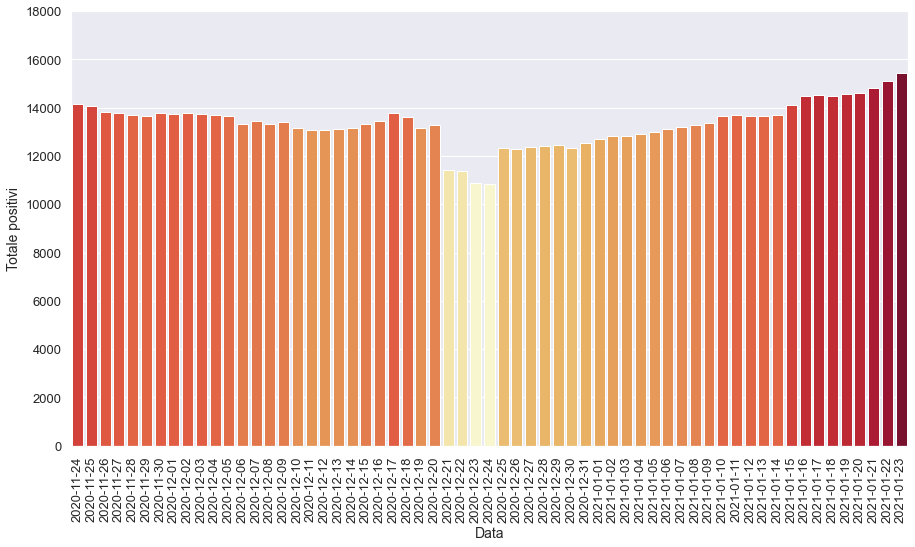

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

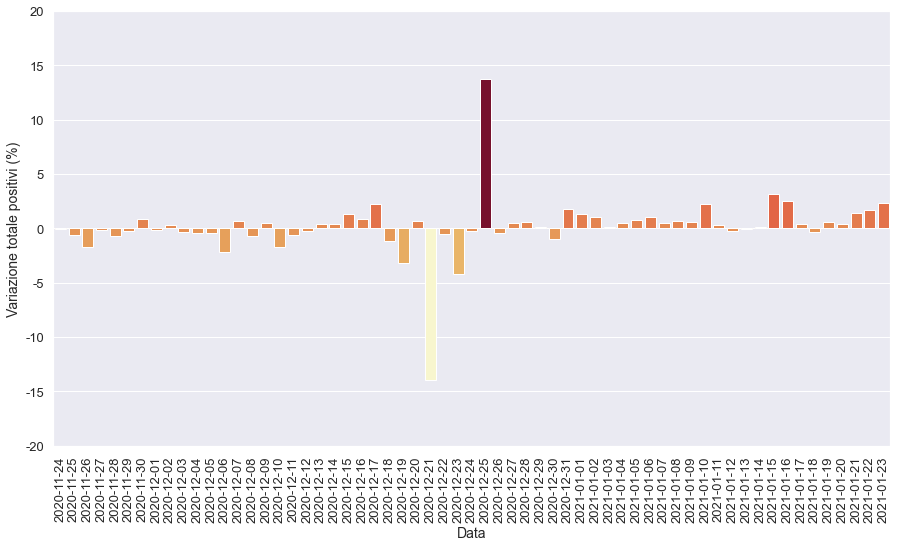

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

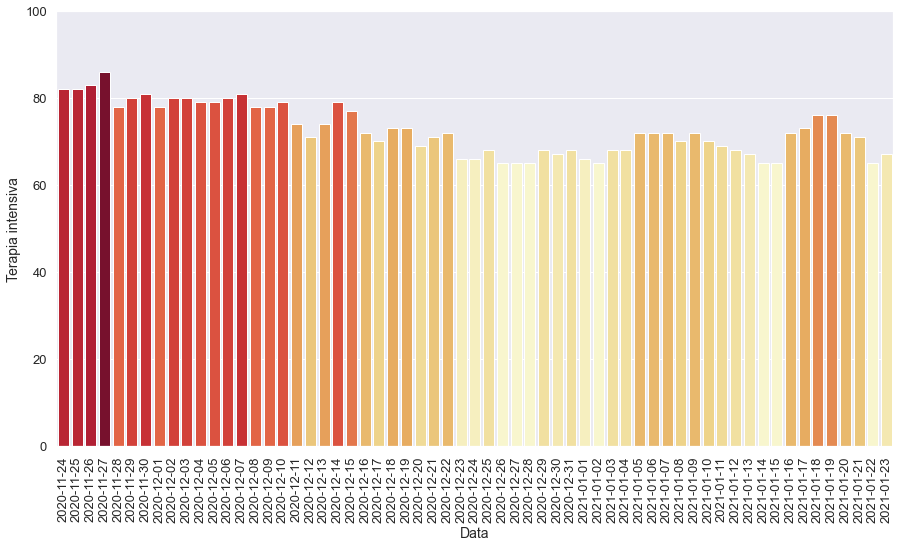

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

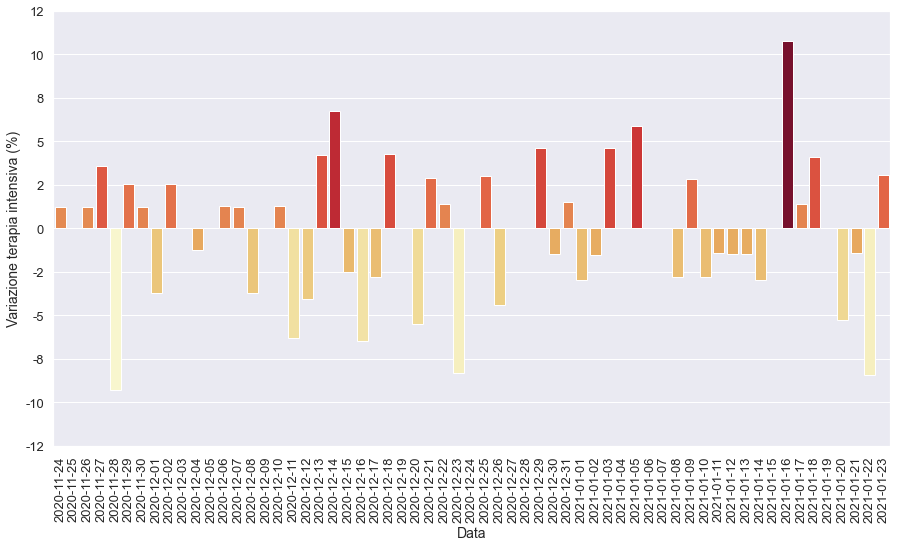

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

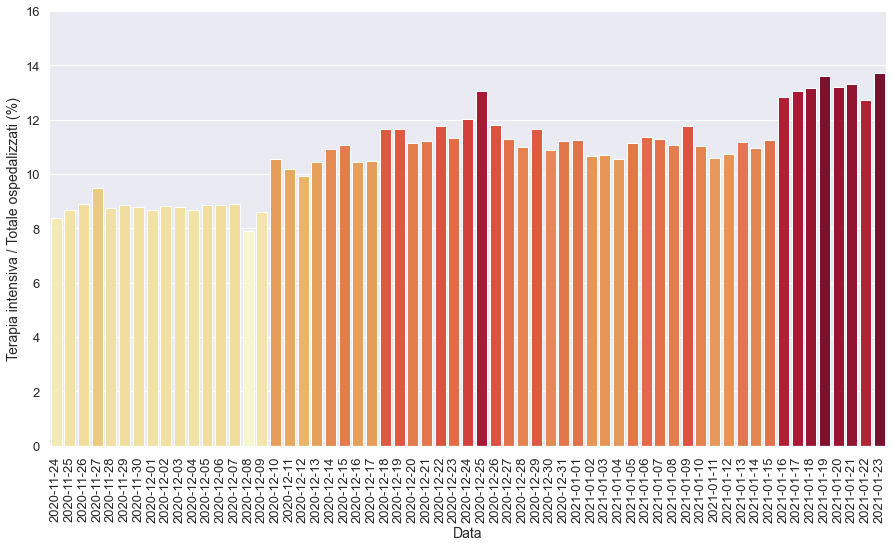

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

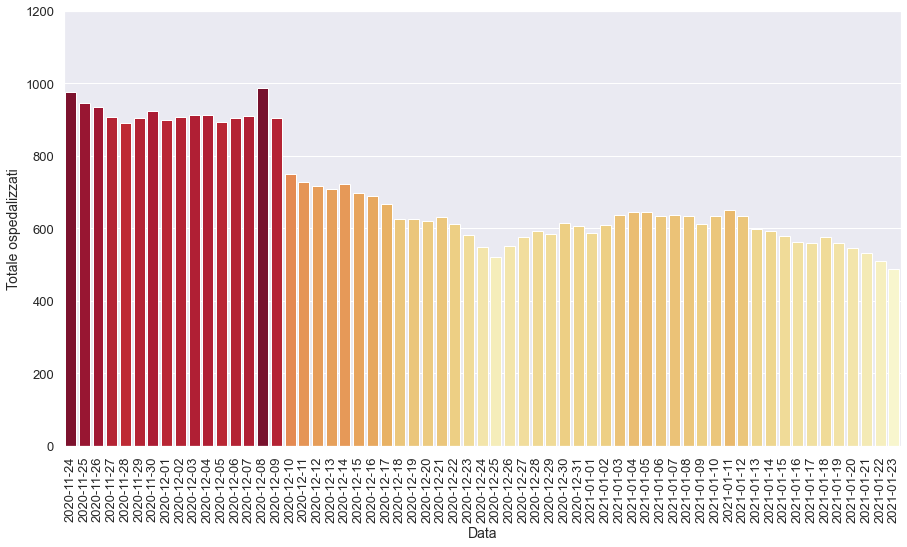

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

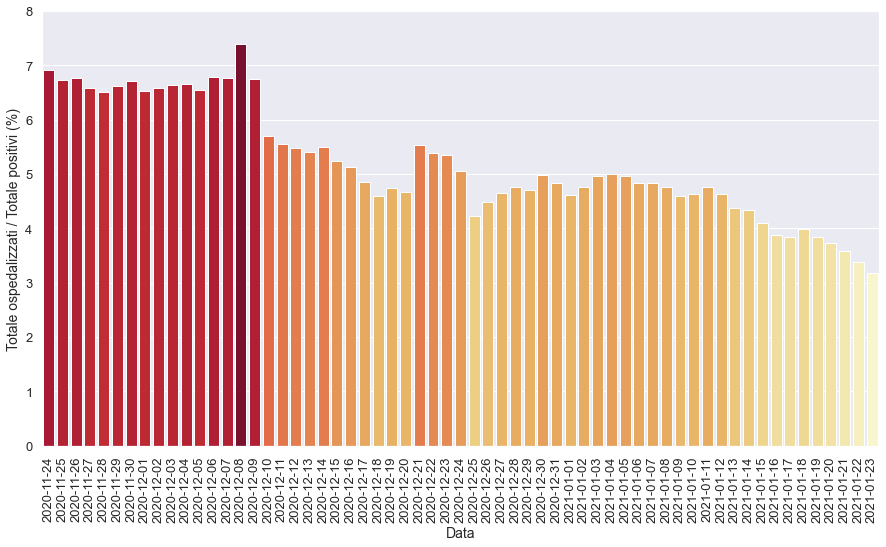

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

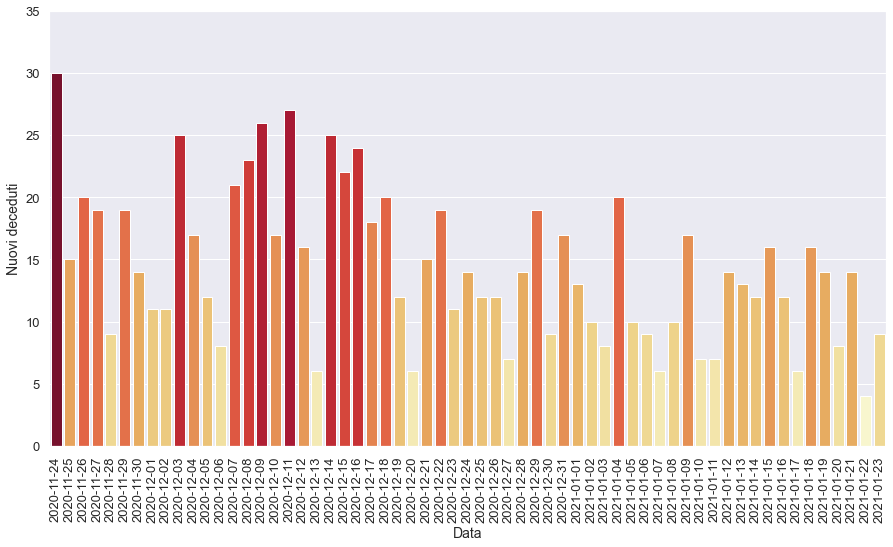

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

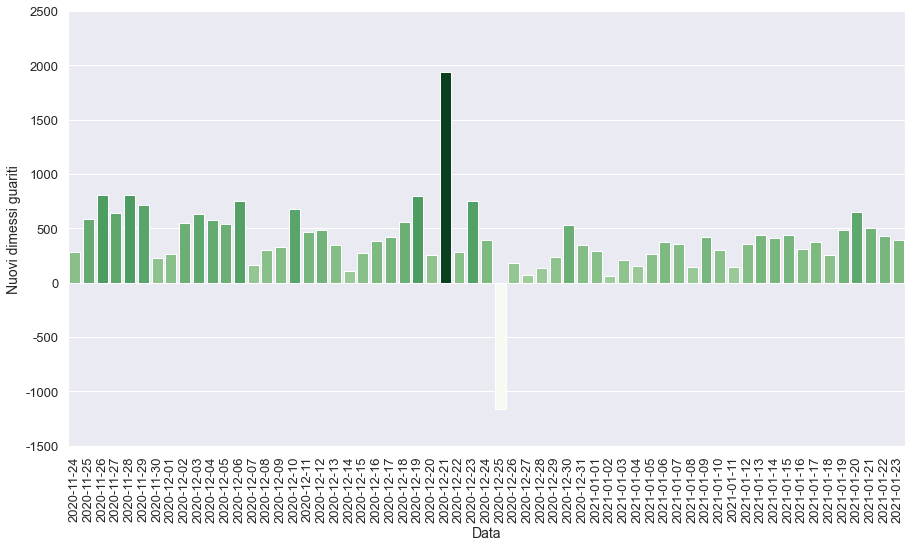

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-24T17:00:00,4,Trentino-Alto Adige,483,66,549,10304,10853,-27,380,...,14.0,4451.0,905.0,6.0,12.02,5.06,8.54,41.99,0.00,-0.25
1,2020-12-25T17:00:00,4,Trentino-Alto Adige,453,68,521,11820,12341,1488,336,...,12.0,5001.0,1748.0,1516.0,13.05,4.22,6.72,19.22,3.03,13.71
2,2020-12-26T17:00:00,4,Trentino-Alto Adige,486,65,551,11741,12292,-49,148,...,12.0,1723.0,-500.0,-79.0,11.80,4.48,8.59,-29.60,-4.41,-0.40
3,2020-12-27T17:00:00,4,Trentino-Alto Adige,510,65,575,11780,12355,63,143,...,7.0,1376.0,337.0,39.0,11.30,4.65,10.39,42.43,0.00,0.51
4,2020-12-28T17:00:00,4,Trentino-Alto Adige,527,65,592,11836,12428,73,219,...,14.0,1850.0,552.0,56.0,10.98,4.76,11.84,39.67,0.00,0.59
5,2020-12-29T17:00:00,4,Trentino-Alto Adige,516,68,584,11854,12438,10,266,...,19.0,2852.0,654.0,18.0,11.64,4.70,9.33,40.67,4.62,0.08
6,2020-12-30T17:00:00,4,Trentino-Alto Adige,548,67,615,11700,12315,-123,417,...,9.0,5003.0,1074.0,-154.0,10.89,4.99,8.33,38.83,-1.47,-0.99
7,2020-12-31T17:00:00,4,Trentino-Alto Adige,539,68,607,11924,12531,216,580,...,17.0,4598.0,957.0,224.0,11.20,4.84,12.61,60.61,1.49,1.75
8,2021-01-01T17:00:00,4,Trentino-Alto Adige,521,66,587,12105,12692,161,463,...,13.0,4978.0,960.0,181.0,11.24,4.62,9.30,48.23,-2.94,1.28
9,2021-01-02T17:00:00,4,Trentino-Alto Adige,545,65,610,12210,12820,128,202,...,10.0,1302.0,359.0,105.0,10.66,4.76,15.51,56.27,-1.52,1.01


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

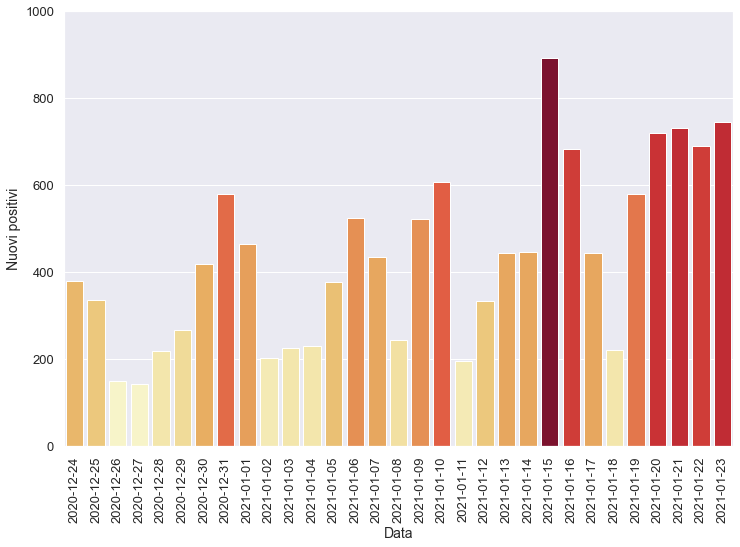

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

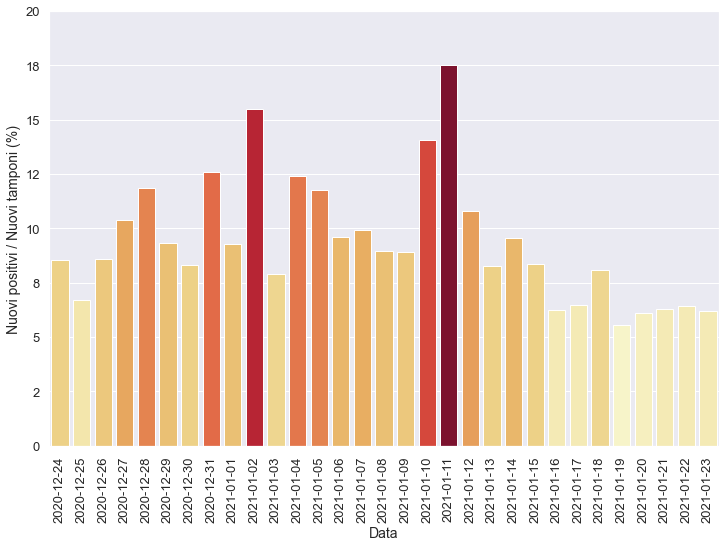

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

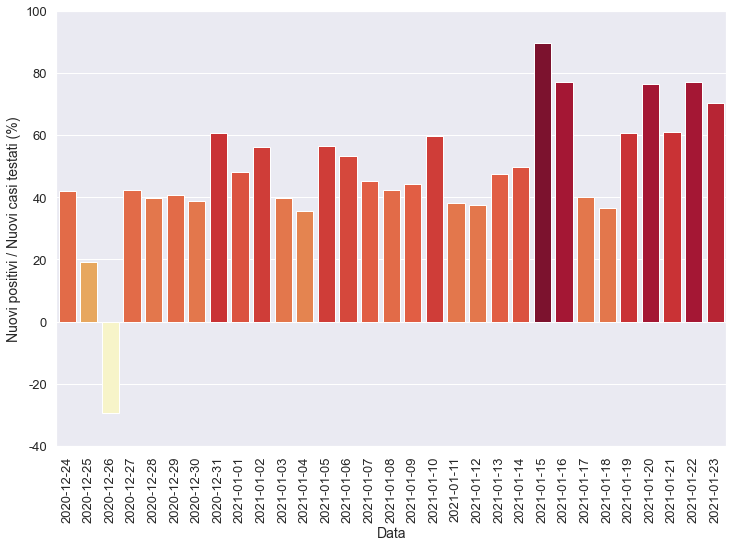

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

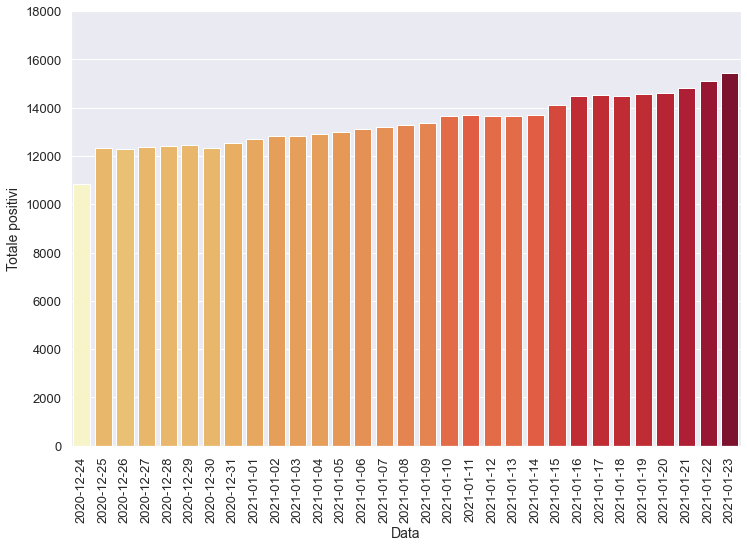

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

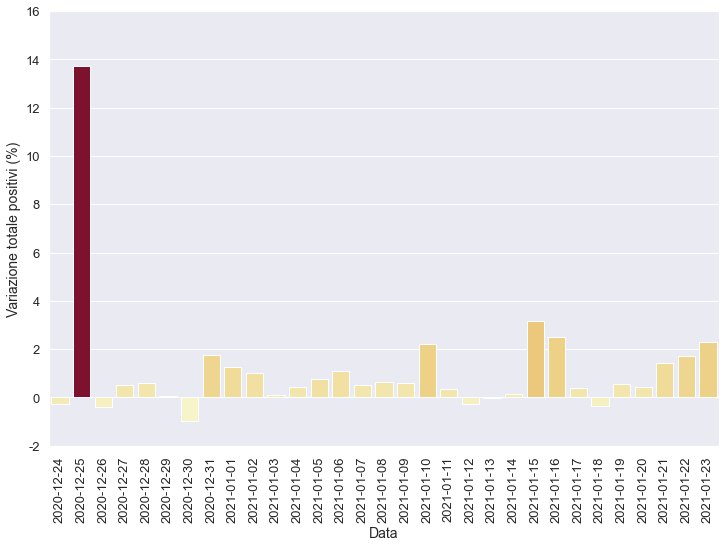

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

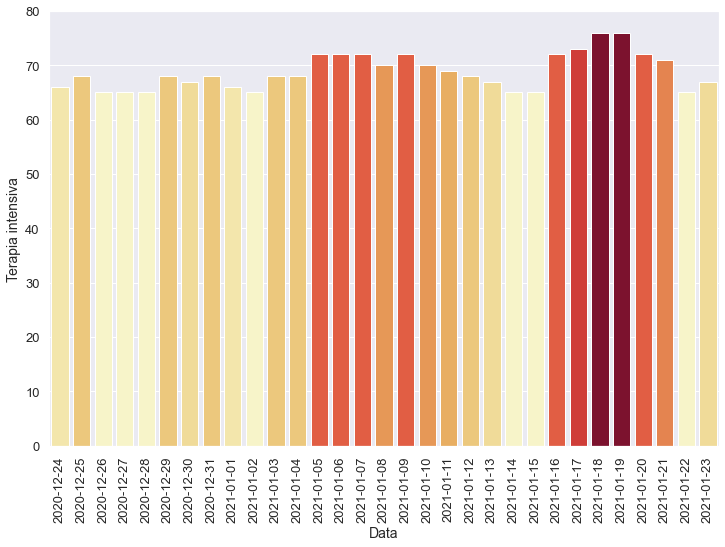

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

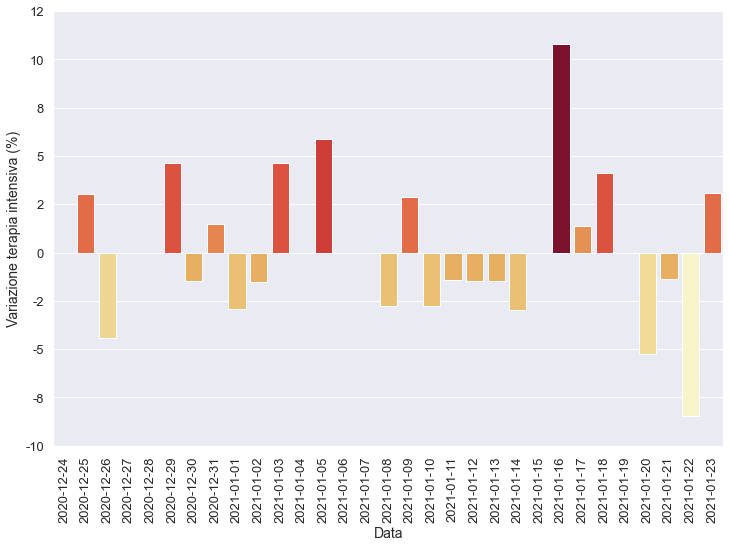

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

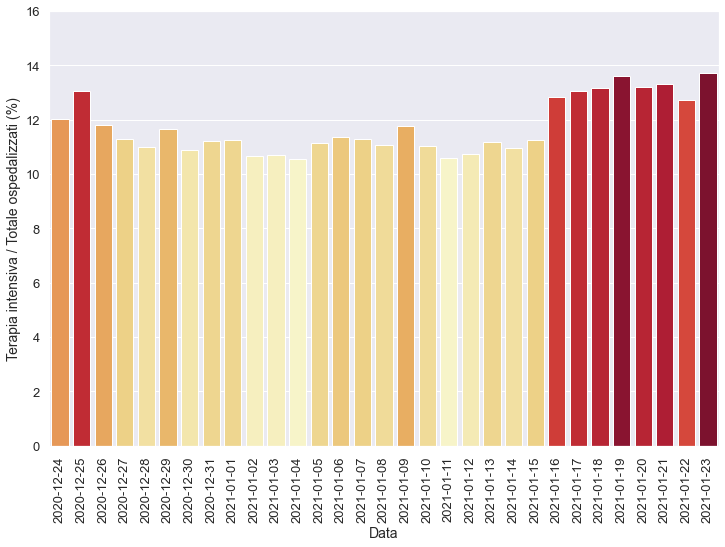

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

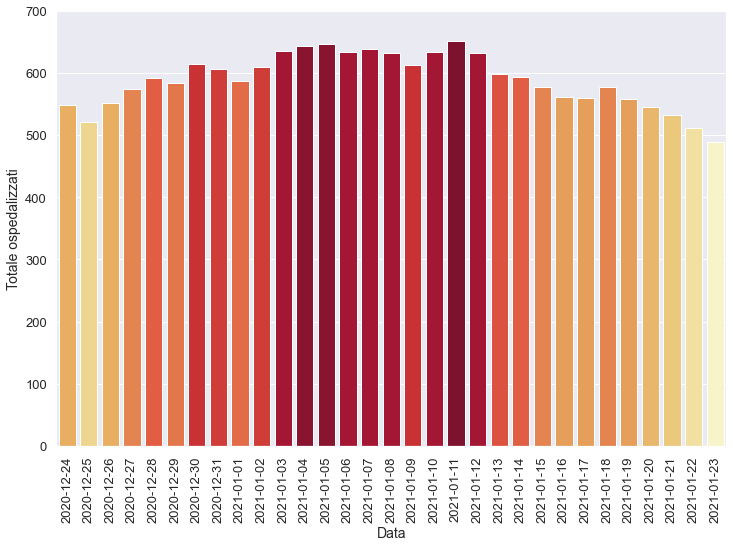

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

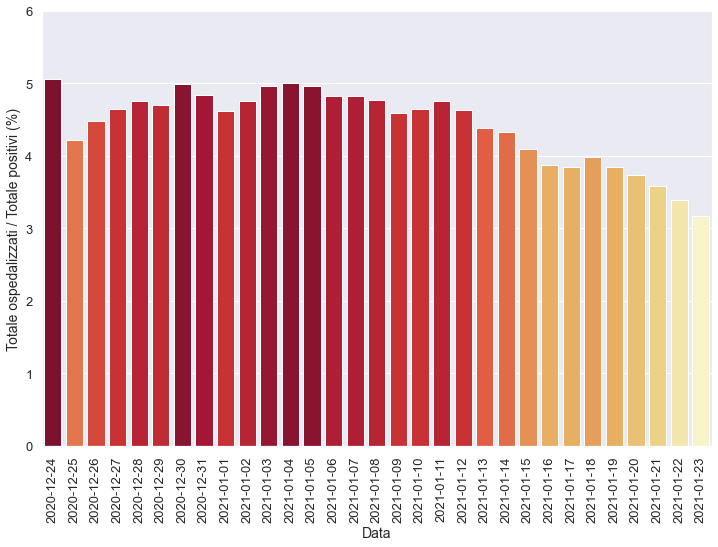

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

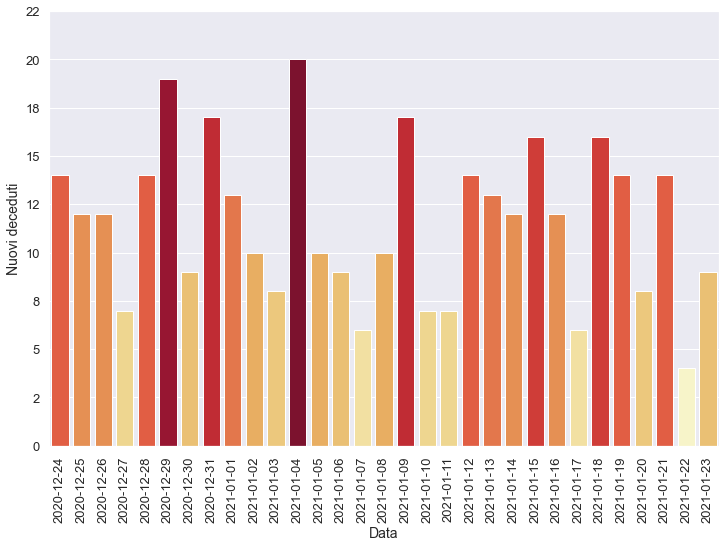

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

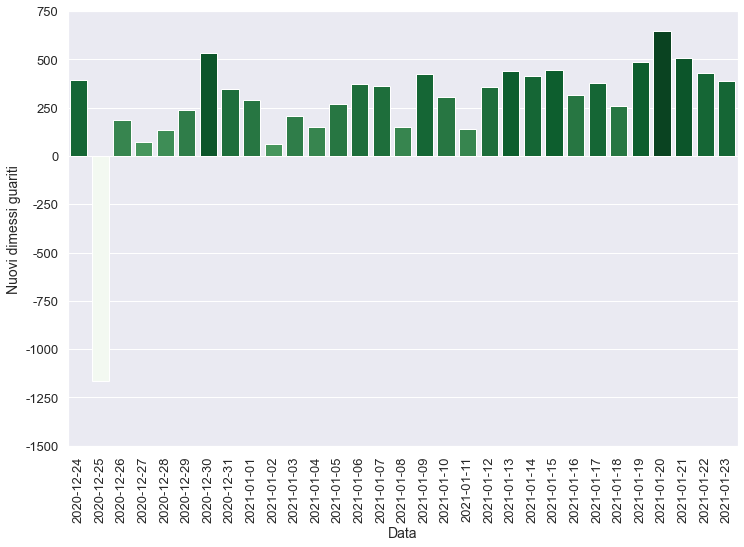

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-16T17:00:00,4,Trentino-Alto Adige,489,72,561,13910,14471,356,682,...,12.0,10931.0,884.0,373.0,12.83,3.88,6.24,77.15,10.77,2.52
1,2021-01-17T17:00:00,4,Trentino-Alto Adige,487,73,560,13969,14529,58,443,...,6.0,6825.0,1109.0,59.0,13.04,3.85,6.49,39.95,1.39,0.40
2,2021-01-18T17:00:00,4,Trentino-Alto Adige,501,76,577,13899,14476,-53,221,...,16.0,2733.0,605.0,-70.0,13.17,3.99,8.09,36.53,4.11,-0.36
3,2021-01-19T17:00:00,4,Trentino-Alto Adige,483,76,559,13995,14554,78,579,...,14.0,10436.0,954.0,96.0,13.60,3.84,5.55,60.69,0.00,0.54
4,2021-01-20T17:00:00,4,Trentino-Alto Adige,473,72,545,14073,14618,64,719,...,8.0,11804.0,939.0,78.0,13.21,3.73,6.09,76.57,-5.26,0.44
5,2021-01-21T17:00:00,4,Trentino-Alto Adige,462,71,533,14296,14829,211,730,...,14.0,11631.0,1196.0,223.0,13.32,3.59,6.28,61.04,-1.39,1.44
6,2021-01-22T17:00:00,4,Trentino-Alto Adige,446,65,511,14575,15086,257,689,...,4.0,10716.0,892.0,279.0,12.72,3.39,6.43,77.24,-8.45,1.73
7,2021-01-23T17:00:00,4,Trentino-Alto Adige,422,67,489,14944,15433,347,745,...,9.0,12011.0,1057.0,369.0,13.70,3.17,6.20,70.48,3.08,2.30


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

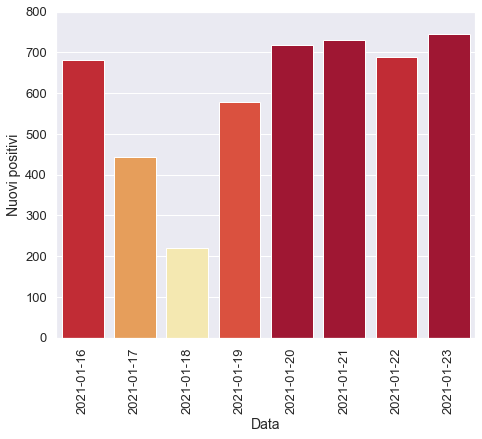

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

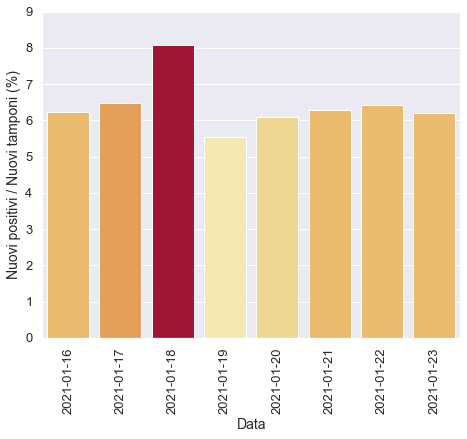

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

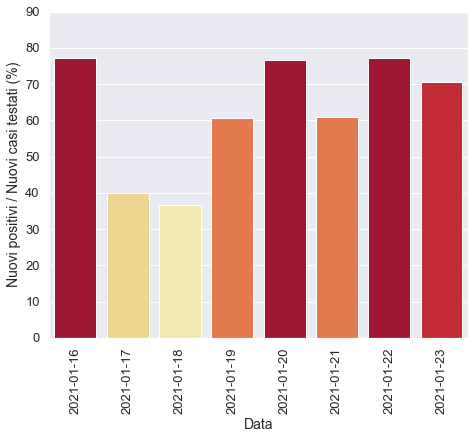

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

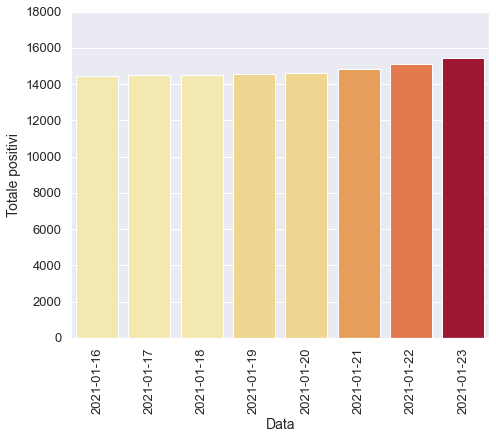

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

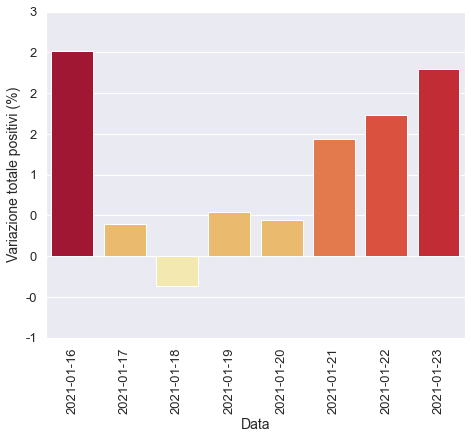

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

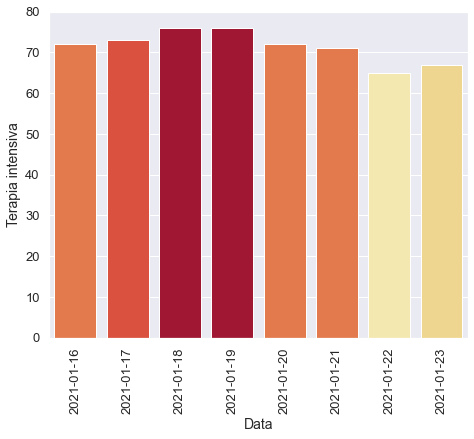

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

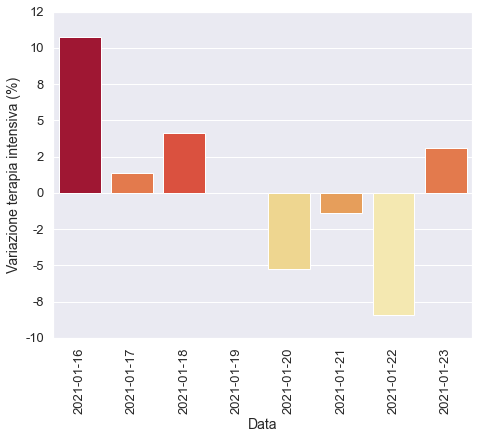

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

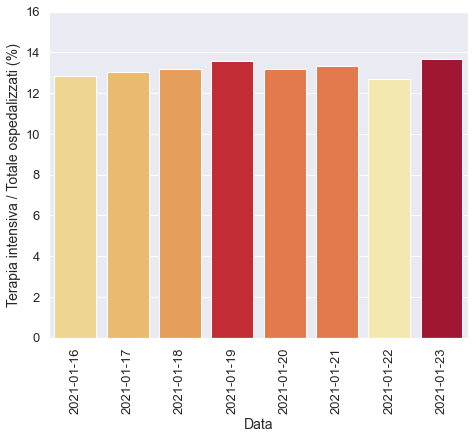

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

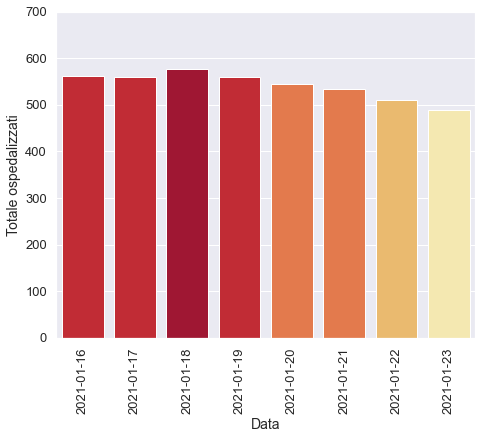

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

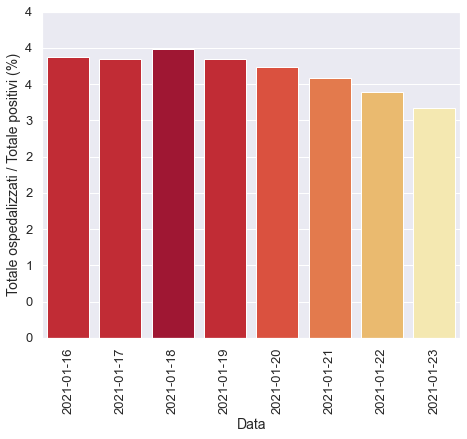

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

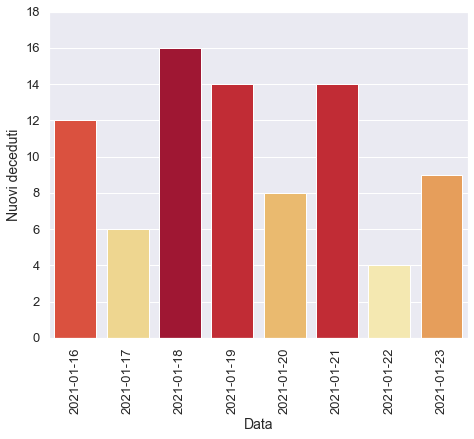

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

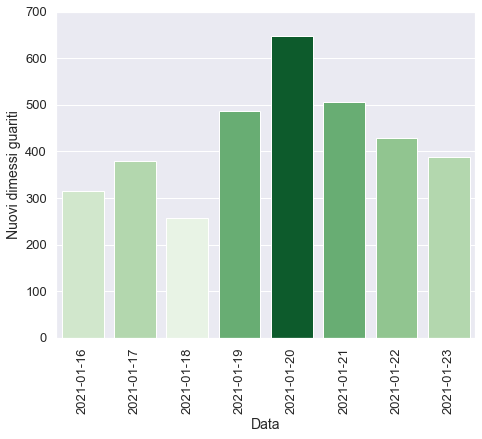

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)